In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("bengaluru_house_prices.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
df.shape

(13320, 9)

In [5]:
df.drop(['area_type','availability','society','balcony'],axis=1,inplace=True)

In [6]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
df.dropna(inplace=True,ignore_index=True)
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
df.shape

(13246, 5)

In [9]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
df.rename(columns={'size':'bhk'},inplace=True)
df['bhk'] = df['bhk'].str.split().str[0].astype(int)                     ##apply(lambda x: int(x.split(' ')[0]))

In [11]:
df.head()

,location,bhk,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00


In [12]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [13]:
def is_float(x):         ###viewing non int values
    try:
        float(x)
    except:
        return False
    return True

In [14]:
df[~df['total_sqft'].apply(is_float)].head(10)

,location,bhk,total_sqft,bath,price
30,Yelahanka,4,2100 - 2850,4.0,186.000
120,Hebbal,4,3067 - 8156,4.0,477.000
135,8th Phase JP Nagar,2,1042 - 1105,2.0,54.005
163,Sarjapur,2,1145 - 1340,2.0,43.490
186,KR Puram,2,1015 - 1540,2.0,56.800
406,Kengeri,1,34.46Sq. Meter,1.0,18.500
545,Hennur Road,2,1195 - 1440,2.0,63.770
642,Arekere,9,4125Perch,9.0,265.000
655,Yelahanka,2,1120 - 1145,2.0,48.130
665,Bettahalsoor,4,3090 - 5002,4.0,445.000


In [15]:
def convert_sqft_to_num(x):             ## Converting int to float and range numbers to float by mean
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [16]:
convert_sqft_to_num('2100 ')

2100.0

In [17]:
convert_sqft_to_num('2100 - 2850')

2475.0

In [18]:
convert_sqft_to_num('34.46Sq. Meter')

In [19]:
df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)
df.head()

,location,bhk,total_sqft,bath,price
0,Electronic City Phase II,2,1056.0,2.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,120.00
2,Uttarahalli,3,1440.0,2.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,95.00
4,Kothanur,2,1200.0,2.0,51.00


In [20]:
print(df.iloc[[406,642,767,863]])

              location  bhk  total_sqft  bath  price
406            Kengeri    1         NaN   1.0   18.5
642            Arekere    9         NaN   9.0  265.0
767       Basavanagara    1         NaN   2.0   93.0
863  Singapura Village    2         NaN   2.0   45.0


In [21]:
df['price_per_sqft'] = df['price']*100000/df['total_sqft']        ## price_per_sqft helps in outlier detection

In [22]:
df.head()

,location,bhk,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000


In [23]:
len(df['location'].unique())

1304

In [24]:
df['location'] = df['location'].str.strip()       ## used to clear the spaces before or after the string           #apply(lambda x: x.strip())

In [25]:
len(df['location'].unique())

1293

In [26]:
location_stats=df['location'].value_counts()
pd.set_option('display.max_rows', None)
print(location_stats)

location
Whitefield                                            535
Sarjapur  Road                                        392
Electronic City                                       304
Kanakpura Road                                        266
Thanisandra                                           236
Yelahanka                                             210
Uttarahalli                                           186
Hebbal                                                176
Marathahalli                                          175
Raja Rajeshwari Nagar                                 171
Bannerghatta Road                                     152
Hennur Road                                           150
7th Phase JP Nagar                                    149
Haralur Road                                          141
Electronic City Phase II                              131
Rajaji Nagar                                          106
Chandapura                                             98
Bella

In [27]:
len(location_stats[location_stats<=10])

1052

In [28]:
loc_less10=location_stats[location_stats<=10]
loc_less10

location
Naganathapura                                         10
Sadashiva Nagar                                       10
Nagappa Reddy Layout                                  10
BTM 1st Stage                                         10
Sector 1 HSR Layout                                   10
Basapura                                              10
Ganga Nagar                                           10
Dairy Circle                                          10
Kalkere                                               10
1st Block Koramangala                                 10
Dodsworth Layout                                      10
Nagadevanahalli                                       10
Gunjur Palya                                          10
2nd Phase JP Nagar                                     9
KUDLU MAIN ROAD                                        9
4th Block Koramangala                                  9
Vignana Nagar                                          9
Ejipura               

In [29]:
len(df['location'].unique())

1293

In [30]:
df['location'] = df['location'].apply (lambda x: 'other' if x in loc_less10 else x)
len(df['location'].unique())

242

In [31]:
df[df.total_sqft/df.bhk<300].head()

,location,bhk,total_sqft,bath,price,price_per_sqft
9,other,6,1020.0,6.0,370.0,36274.509804
45,HSR Layout,8,600.0,9.0,200.0,33333.333333
57,Murugeshpalya,6,1407.0,4.0,150.0,10660.980810
67,Devarachikkanahalli,8,1350.0,7.0,85.0,6296.296296
69,other,3,500.0,3.0,100.0,20000.000000


In [32]:
df=df[~(df.total_sqft/df.bhk<300)]
df.shape

(12502, 6)

In [33]:
df['price_per_sqft'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [34]:
def remove_pps_outliers(df):               ## Removing the outliers present in Price per sqft
    df_out=pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        sd=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-sd))&(subdf.price_per_sqft<=(m+sd))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df=remove_pps_outliers(df)
df.shape

(10241, 6)

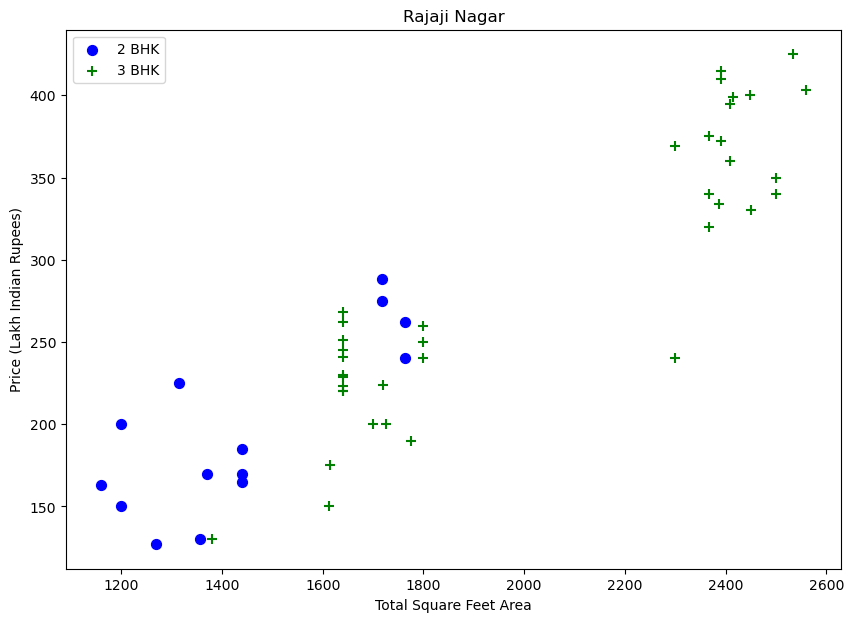

In [35]:
def plot_scatter_chart(df,location):                            ## viewing the scatter plot where 2bhk price is greater than 3bhk
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.rcParams['figure.figsize'] = (10,7)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df,"Rajaji Nagar")

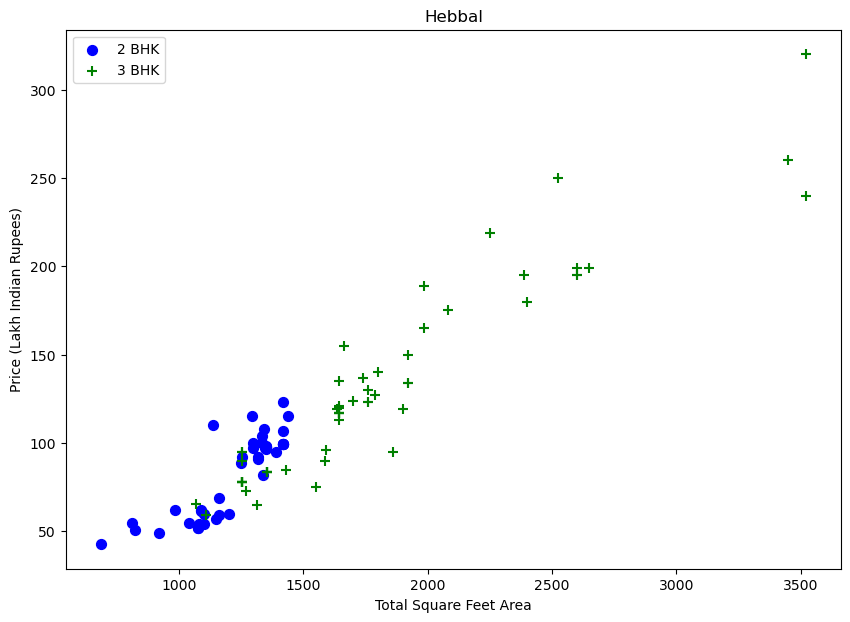

In [36]:
plot_scatter_chart(df,"Hebbal")

In [37]:
def remove_bhk_outliers(df):                            ## Removing the 2bhk price is greater than 3bhk by mean and STD
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df = remove_bhk_outliers(df)
df.shape

(7329, 6)

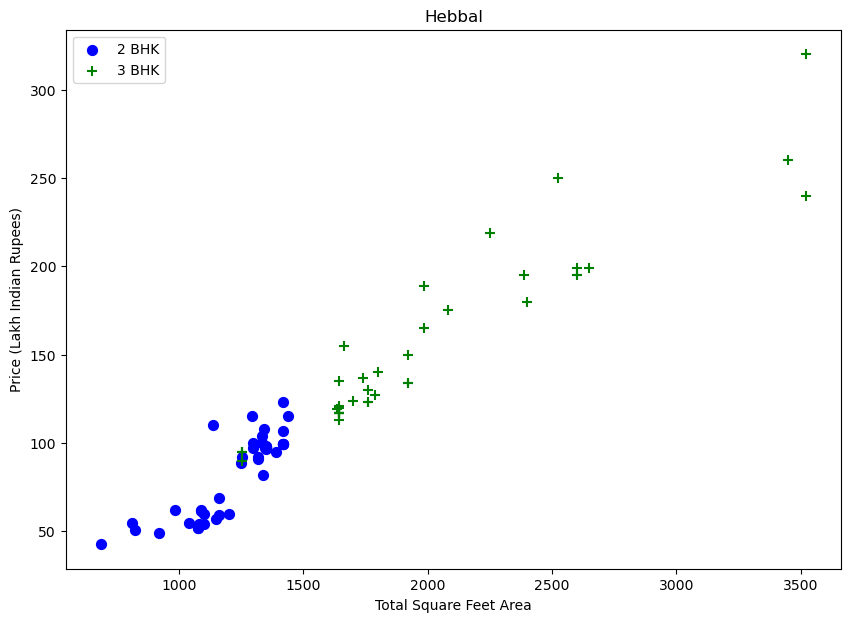

In [38]:
plot_scatter_chart(df,"Hebbal")

Text(0, 0.5, 'Count')

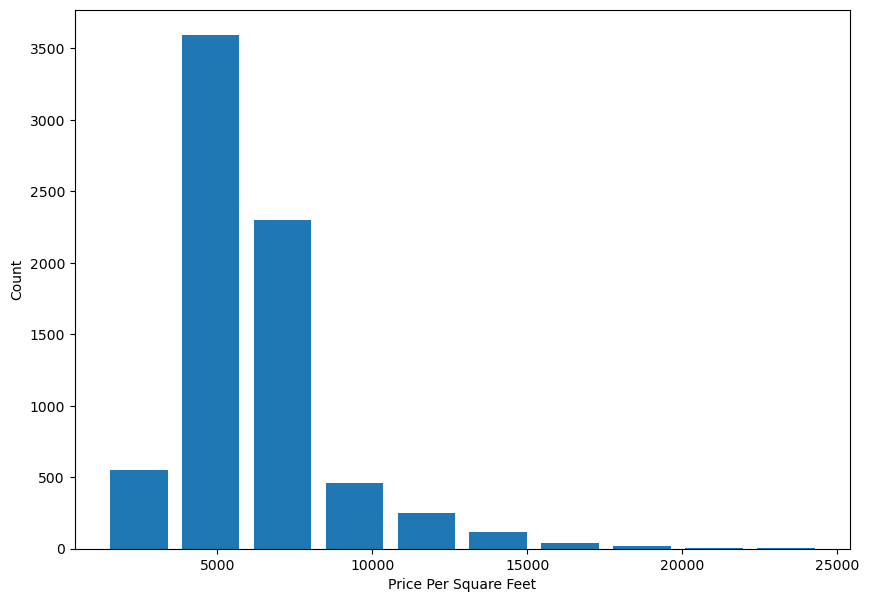

In [39]:
plt.rcParams["figure.figsize"] = (10,7)          ## Ploting histogram for price_per_sqft
plt.hist(df.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

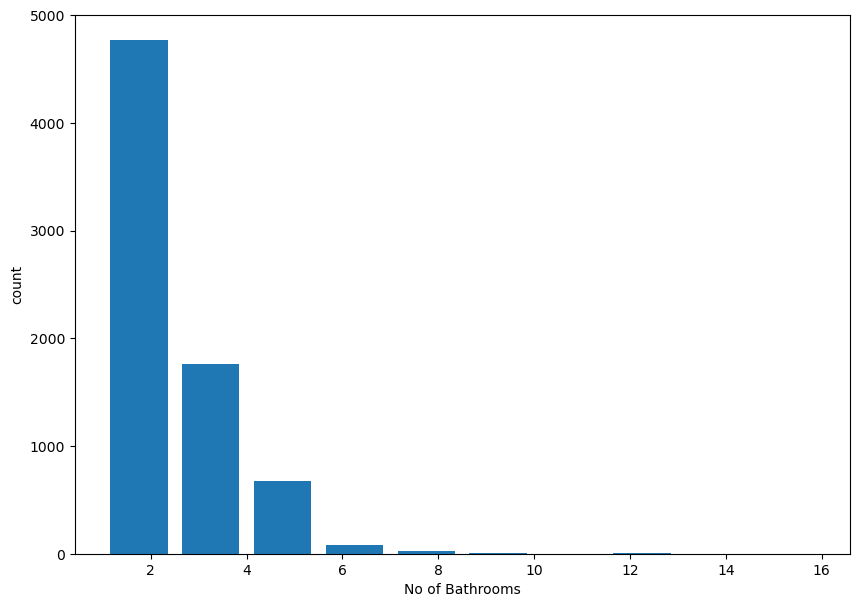

In [40]:
plt.hist(df.bath,rwidth=0.8)                     ## Ploting histogram for bath
plt.xlabel("No of Bathrooms")
plt.ylabel("count")
plt.show()

In [41]:
df['bath'].unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [42]:
df[df.bath>df.bhk+2]

,location,bhk,total_sqft,bath,price,price_per_sqft
1626,Chikkabanavar,4,2460.0,7.0,80.0,3252.032520
5238,Nagasandra,4,7000.0,8.0,450.0,6428.571429
6711,Thanisandra,3,1806.0,6.0,116.0,6423.034330
8411,other,6,11338.0,9.0,1000.0,8819.897689


In [43]:
df=df[df.bath<df.bhk+2]
df.shape

(7251, 6)

In [44]:
df.drop(['price_per_sqft'],axis=1,inplace=True)
df.head()

,location,bhk,total_sqft,bath,price
0,1st Block Jayanagar,4,2850.0,4.0,428.0
1,1st Block Jayanagar,3,1630.0,3.0,194.0
2,1st Block Jayanagar,3,1875.0,2.0,235.0
3,1st Block Jayanagar,3,1200.0,2.0,130.0
4,1st Block Jayanagar,2,1235.0,2.0,148.0


In [45]:
df.reset_index(drop=True,inplace=True)

In [46]:
df1 = df.copy()

In [47]:
df=pd.get_dummies(df,drop_first=True,dtype=int)
df.head()

,bhk,total_sqft,bath,price,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,location_5th Phase JP Nagar,location_6th Phase JP Nagar,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,4,2850.0,4.0,428.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1630.0,3.0,194.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1875.0,2.0,235.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1200.0,2.0,130.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1235.0,2.0,148.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df.shape

(7251, 245)

In [49]:
X = df.drop('price',axis=1)
y = df['price']

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [51]:
# Modeling with default parameters
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Prediction
train_predictions = lr_model.predict(X_train)
test_predictions = lr_model.predict(X_test)

# Evaluation
lr_train = lr_model.score(X_train, y_train)
lr_test = lr_model.score(X_test, y_test)
lr_cv = cross_val_score(lr_model, X, y, cv=cv, scoring='r2').mean()

print('Train R2:', lr_train)
print('Test R2:', lr_test)
print("CV Score:", lr_cv)

Train R2: 0.8406397808899619
Test R2: 0.8746160116851525
CV Score: 0.8462123289341031


In [52]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [53]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [54]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('-'*35)
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 33.8034
- Mean Absolute Error: 17.1126
- R2 Score: 0.8406
-----------------------------------
Model performance for Test set
- Root Mean Squared Error: 34.9334
- Mean Absolute Error: 17.9900
- R2 Score: 0.8746


Lasso
Model performance for Training set
- Root Mean Squared Error: 45.8232
- Mean Absolute Error: 23.2087
- R2 Score: 0.7072
-----------------------------------
Model performance for Test set
- Root Mean Squared Error: 50.7301
- Mean Absolute Error: 25.2049
- R2 Score: 0.7356


Ridge
Model performance for Training set
- Root Mean Squared Error: 34.2189
- Mean Absolute Error: 17.1856
- R2 Score: 0.8367
-----------------------------------
Model performance for Test set
- Root Mean Squared Error: 34.7455
- Mean Absolute Error: 17.9252
- R2 Score: 0.8760


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 39.9426
- Mean Absolute Error: 17.8532
- R2 Score: 0.7775
------

In [55]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
6,XGBRegressor,0.910128
2,Ridge,0.875962
0,Linear Regression,0.874616
5,Random Forest Regressor,0.837993
7,CatBoosting Regressor,0.776994
1,Lasso,0.735582
4,Decision Tree,0.696744
3,K-Neighbors Regressor,0.677773
8,AdaBoost Regressor,0.655590


In [56]:
def predict_price(location,total_sqft,bath,bhk):    
    if f'location_{location}' in X.columns:
        loc_index = X.columns.get_loc(f'location_{location}')
    else:
        loc_index = 0

    x = np.zeros(len(X.columns))
    x[0] = bhk
    x[1] = total_sqft
    x[2] = bath
    
    if loc_index >= 3:
        x[loc_index] = 1

    return lr_model.predict([x])[0]

In [67]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

93.16334356603241

In [58]:
predict_price('1st Phase JP Nagar',1059, 2, 2)

98.34931793480403

In [59]:
predict_price('Indira Nagar',2360, 3, 3)

268.7695085687649

In [66]:
predict_price('Ejipura',1000, 2, 2)

175.54874555681585

In [61]:
import pickle
pickle.dump(lr_model,open('banglore_home_prices_model.pkl','wb'))

In [62]:
df2 = pd.get_dummies(df1.location,drop_first=True)
df1_dropped = df1.drop(['location', 'price'], axis=1)
df3 = pd.concat([df1_dropped, df2], axis=1)

,bhk,total_sqft,bath,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,4,2850.0,4.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3,1630.0,3.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1875.0,2.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,1200.0,2.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2,1235.0,2.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [63]:
import json

columns = {
    'data_columns' : [col.lower() for col in df3.columns]
          }

with open("columns.json","w") as f:
    f.write(json.dumps(columns))